# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report


#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [2]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("Training images shape:", cifar100_train_images.shape)
print("Testing images shape:", cifar100_test_images.shape)
print("Training labels shape:", cifar100_train_labels.shape)
print("Testing labels shape:", cifar100_test_labels.shape)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)


#### Data Preprocessing

In [3]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0


In [4]:
num_classes = 100

cifar100_train_labels_one_hot = keras.utils.to_categorical(
    cifar100_train_labels, num_classes=num_classes
)

cifar100_test_labels_one_hot = keras.utils.to_categorical(
    cifar100_test_labels, num_classes=num_classes
)


In [5]:
print("Processed training images:", cifar100_train_images.shape)
print("Processed training labels:", cifar100_train_labels_one_hot.shape)
print("Processed testing images:", cifar100_test_images.shape)
print("Processed testing labels:", cifar100_test_labels_one_hot.shape)


Processed training images: (50000, 32, 32, 3)
Processed training labels: (50000, 100)
Processed testing images: (10000, 32, 32, 3)
Processed testing labels: (10000, 100)


Model 1: ANN for CIFAR-100

In [6]:
ann_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

Model 2: Basic CNN

In [7]:
basic_cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
])

basic_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

basic_cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Model 3: Deeper CNN (Best Practice for CIFAR-100)

In [8]:
deeper_cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(100, activation='softmax')
])

deeper_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

deeper_cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,412 (2.46 MB)

 Trainable params: 644,452 (2.46 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [10]:
checkpoint_ann = keras.callbacks.ModelCheckpoint(
    'best_ann_cifar100.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True
)

ann_history = ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=128,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, checkpoint_ann]
)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.0468 - loss: 4.3529 - val_accuracy: 0.1072 - val_loss: 3.8634
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.1295 - loss: 3.7599 - val_accuracy: 0.1489 - val_loss: 3.6601
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.1649 - loss: 3.5449 - val_accuracy: 0.1606 - val_loss: 3.6046
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.1898 - loss: 3.4045 - val_accuracy: 0.1896 - val_loss: 3.4295
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.2015 - loss: 3.3219 - val_accuracy: 0.1901 - val_loss: 3.4249
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.2205 - loss: 3.2299 - val_accuracy: 0.2115 - val_loss: 3.3464
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.2340 - loss: 3.1627 - val_accuracy: 0.1995 - val_loss: 3.3575
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.2449 - loss: 3.1026 - 

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [11]:
checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    'best_basic_cnn_cifar100.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True
)

basic_cnn_history = basic_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=128,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, checkpoint_basic_cnn]
)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 141ms/step - accuracy: 0.0588 - loss: 4.2581 - val_accuracy: 0.1573 - val_loss: 3.6252
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - accuracy: 0.1891 - loss: 3.4176 - val_accuracy: 0.2355 - val_loss: 3.1908
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.2570 - loss: 3.0581 - val_accuracy: 0.2622 - val_loss: 3.0173
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 144ms/step - accuracy: 0.2938 - loss: 2.8563 - val_accuracy: 0.2914 - val_loss: 2.8885
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.3202 - loss: 2.7160 - val_accuracy: 0.3132 - val_loss: 2.7775
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 138ms/step - accuracy: 0.3568 - loss: 2.5779 - val_accuracy: 0.3264 - val_loss: 2.7339
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 142ms/step - accuracy: 0.3777 - loss: 2.4676 - val_accuracy: 0.3427 - val_loss: 2.6580
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 138ms/step - accuracy: 0.3942 - loss: 2

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [13]:
checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    'best_deeper_cnn_cifar100.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True
)

deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=40,
    batch_size=128,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, checkpoint_deeper_cnn]
)


Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 152s 389ms/step - accuracy: 0.4530 - loss: 2.0382 - val_accuracy: 0.4645 - val_loss: 2.0354
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 146s 374ms/step - accuracy: 0.4675 - loss: 1.9909 - val_accuracy: 0.4768 - val_loss: 1.9572
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 204s 378ms/step - accuracy: 0.4729 - loss: 1.9536 - val_accuracy: 0.4552 - val_loss: 2.0556
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 157s 401ms/step - accuracy: 0.4821 - loss: 1.9196 - val_accuracy: 0.4497 - val_loss: 2.1262
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 152s 390ms/step - accuracy: 0.4833 - loss: 1.8927 - val_accuracy: 0.4443 - val_loss: 2.1880
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 377ms/step - accuracy: 0.4924 - loss: 1.8673 - val_accuracy: 0.4647 - val_loss: 2.0700
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 205s 386ms/step - accuracy: 0.5066 - loss: 1.8166 - val_accuracy: 0.4674 - val_loss: 2.0107


### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

In [14]:
ann_model.load_weights('best_ann_cifar100.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_cifar100.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_cifar100.weights.h5')

loss_ann, acc_ann = ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot)
loss_basic, acc_basic = basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot)
loss_deeper, acc_deeper = deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot)

print("ANN Accuracy:", acc_ann)
print("Basic CNN Accuracy:", acc_basic)
print("Deeper CNN Accuracy:", acc_deeper)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2353 - loss: 3.2636
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3810 - loss: 2.5015
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4768 - loss: 1.9745
ANN Accuracy: 0.2370000034570694
Basic CNN Accuracy: 0.3781000077724457
Deeper CNN Accuracy: 0.47679999470710754


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


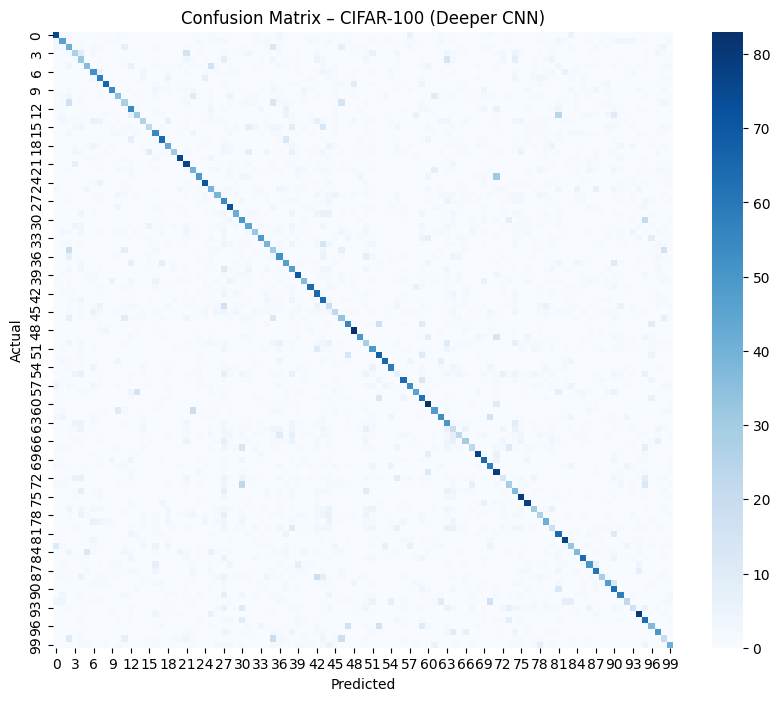

In [15]:
best_model = deeper_cnn_model

predictions = best_model.predict(cifar100_test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = cifar100_test_labels.flatten()

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap='Blues')
plt.title("Confusion Matrix – CIFAR-100 (Deeper CNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

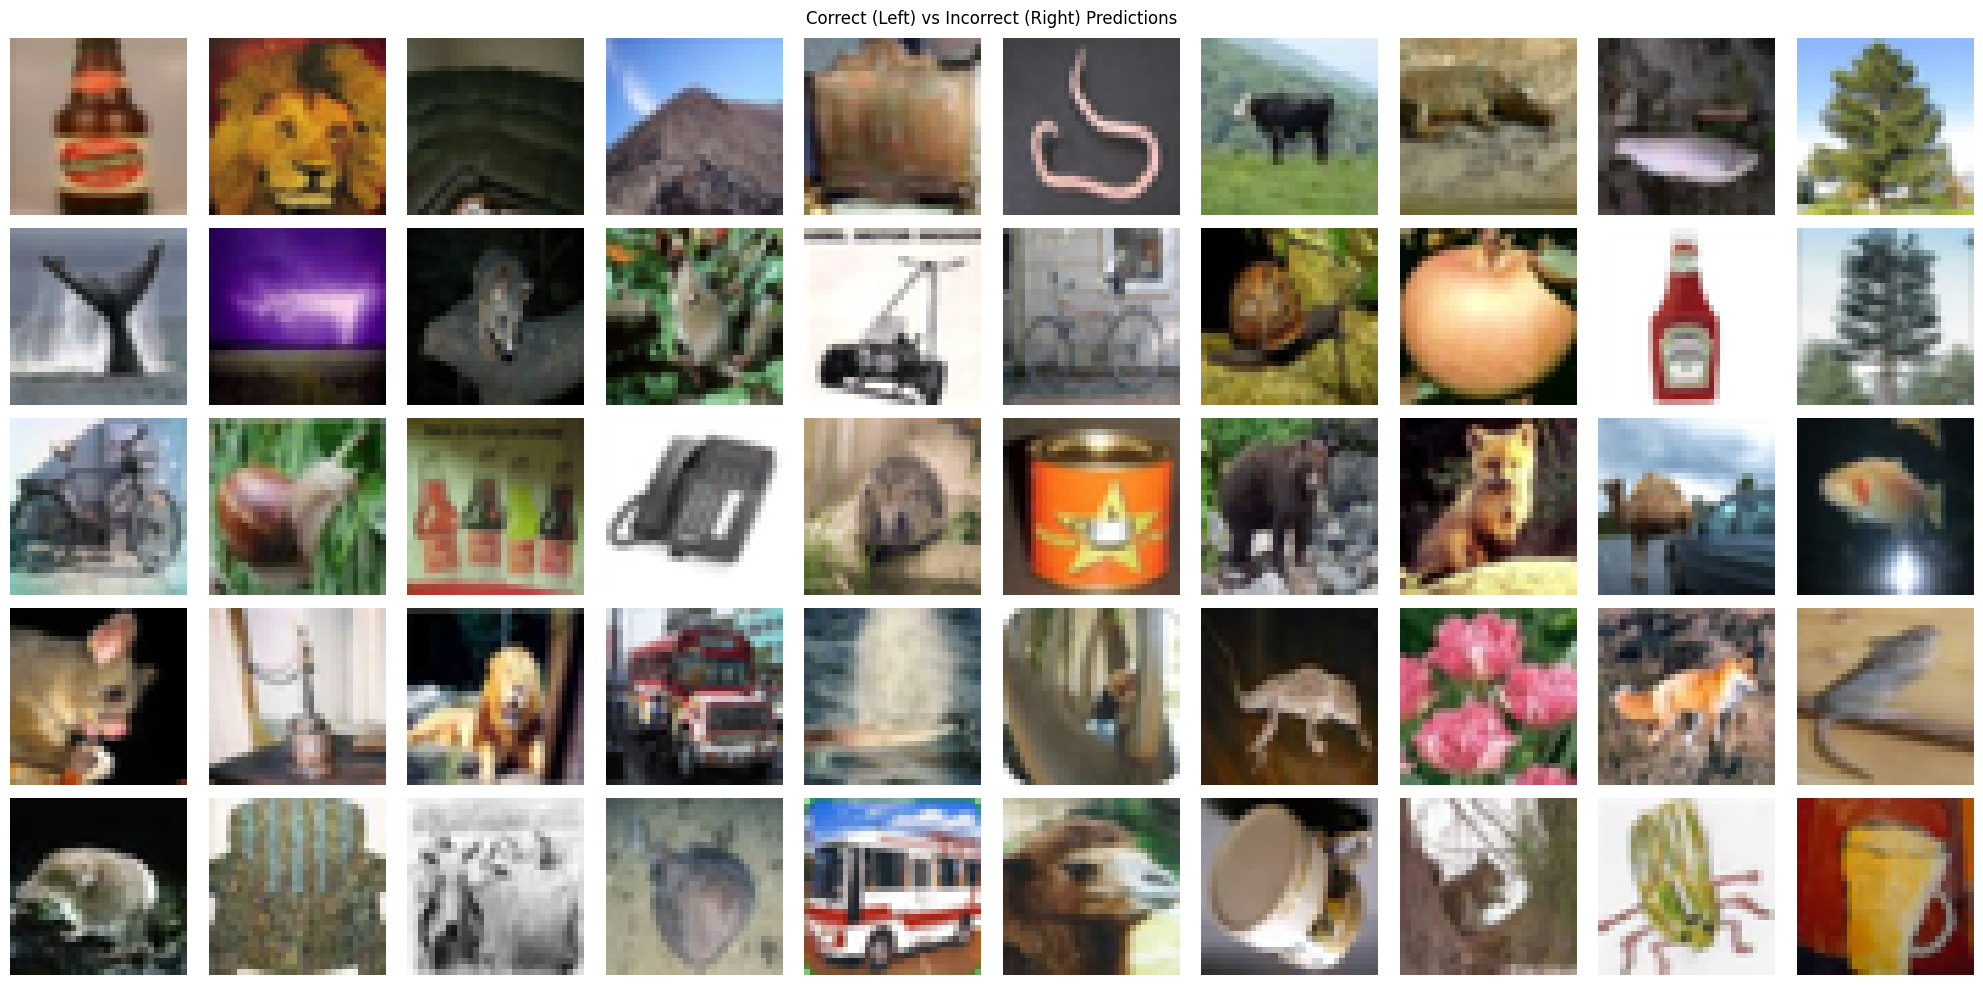

In [16]:
correct = np.where(predicted_labels == true_labels)[0]
incorrect = np.where(predicted_labels != true_labels)[0]

sample_correct = np.random.choice(correct, 25, replace=False)
sample_incorrect = np.random.choice(incorrect, 25, replace=False)

fig, axes = plt.subplots(5, 10, figsize=(20, 10))
fig.suptitle("Correct (Left) vs Incorrect (Right) Predictions")

for i, idx in enumerate(np.concatenate((sample_correct, sample_incorrect))):
    ax = axes[i // 10, i % 10]
    ax.imshow(cifar100_test_images[idx])
    ax.axis("off")

plt.tight_layout()
plt.show()


## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.